In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re 
import string 

#Import Classifer Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

#Import NLTK Libraries
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk import word_tokenize 
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#Import SKLearn Modules
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.base import TransformerMixin
from collections import OrderedDict, Counter
from  sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.pipeline  import Pipeline, FeatureUnion, make_pipeline

#Set Display Settings
from IPython.display import Image
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1) 
np.set_printoptions(threshold=np.nan)

#Import Other Modules
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS 
from time import gmtime, strftime
from datetime import datetime,  timedelta
import warnings
warnings.filterwarnings("ignore")

# Context

* Nike announced its partnership with Colin Kaepernick to be the face of the 30th anniversary of its JustDoIt campaign. 
* They used the slogan "Believe in something, even if it means sacrificing everything."
* Kaepernick had made a controversial decision not to stand up during the national anthem, as a protest to police brutality, a while back. 
* This has stirred a heated debate, and became a big national issue especially when Donald Trump commented on it.

# Explore Data Set

* This dataset contains 5,000 tweets that contain the hashtag #JustDoIt. 
* All tweets happened on September 7, 2018, which is days after Nike made its announcement to endorse Kaepernick.

In [4]:
#Pull Just Do it Twitter Data
path = '/Users/mac/Dropbox/Thinkful_Coursework/Course/Unit_4/Lesson 4/justdoit_tweets.csv'
df = pd.read_csv(path)  

#Review Dataframe
print (df.shape)
df.head(1)

(5089, 72)


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}",0,False,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow"">Statusbrew</a>",False,"{'id': 3188618684, 'id_str': '3188618684', 'name': 'Ultra YOU Woman', 'screen_name': 'UltraYOUwoman', 'location': 'California, USA', 'description': 'I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories, skincare & post-birth snap back!', 'url': 'https://t.co/jGlJswxjwS', 'entities': {'url': {'urls': [{'url': 'https://t.co/jGlJswxjwS', 'expanded_url': 'https://about.me/ultrayouwoman', 'display_url': 'about.me/ultrayouwoman', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 57983, 'friends_count': 48721, 'listed_count': 629, 'created_at': 'Fri May 08 10:27:51 +0000 2015', 'favourites_coun

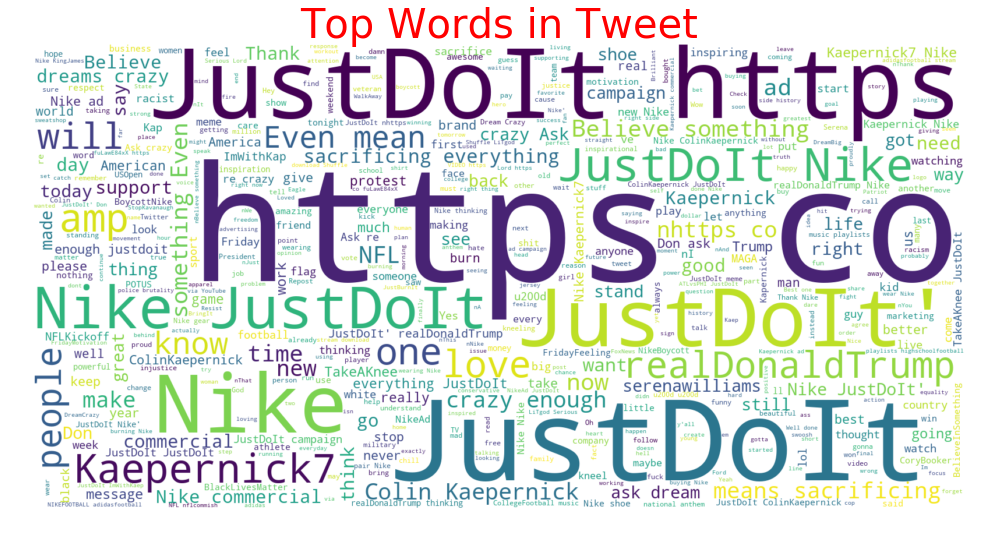

In [5]:
#Create Word Cloud of Tweet Text
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(df['tweet_full_text'])))

#Plot Word Cloud
plt.figure(figsize=(20,10))
plt.title("Top Words in Tweet", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

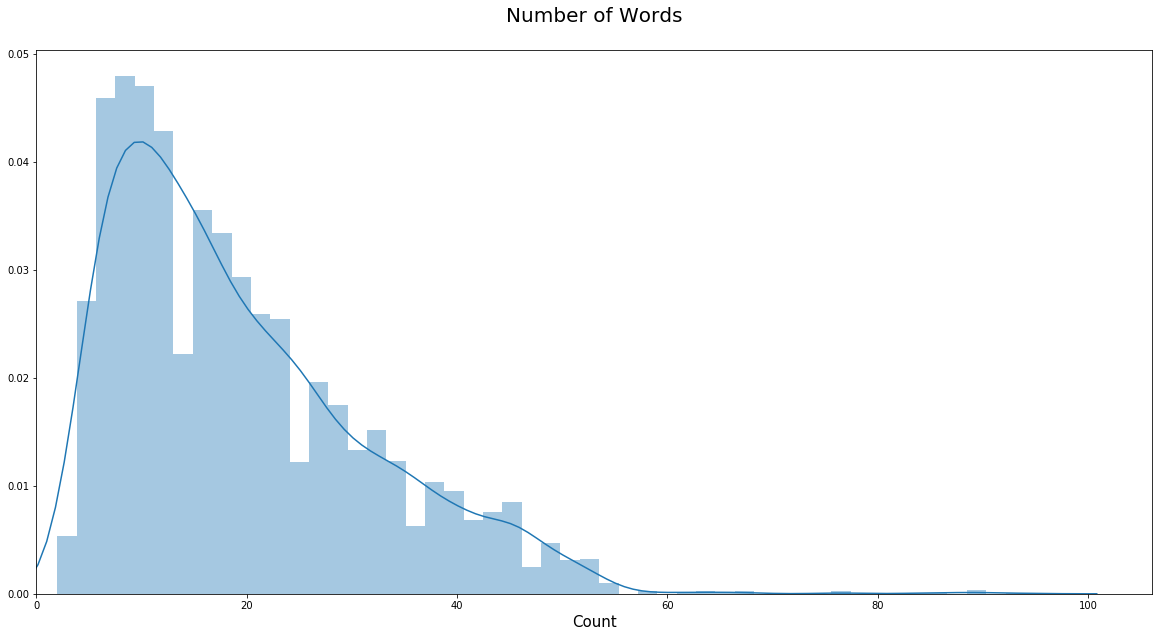

In [6]:
#Plot Number of Words in Tweets Text
df['num_words']= df.tweet_full_text.apply(lambda x: len(str(x).split())) 

plt.figure(figsize=(20,10))
g=sns.distplot(df.num_words)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

plt.show()

# Clean Data Set

In [7]:
import nltk
nltk.download('wordnet')

#Assign Lemmatizer to Variable
lemma = WordNetLemmatizer()
print(lemma.lemmatize('waiting'))

#Assign Stemmer to Variable
stemmer = SnowballStemmer('english')
print(stemmer.stem('waiting'))

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
waiting
wait


In [8]:
#Clean Text Column by Tokenizing, Removing Stop Words, Numbers, Punctuations.  Then Lemmatize. 
stopwords_set = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def tokenize_sentence(sentence):
    if type(sentence)==str: 
        return [lemma.lemmatize(word) for word in sentence.lower().split() if word not in stopwords_set and\
            word not in punctuation and word.isalpha()]
    else:
        return []

In [9]:
#Create New Features for Tokenized and Clean Text
df['tokenized_text'] = df.tweet_full_text.apply(lambda x: tokenize_sentence(x)) 
df['text_clean']= df.tokenized_text.apply(lambda x: ' '.join([i for i in x]))

#Check Dataframe for New Features
df.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,num_words,tokenized_text,text_clean
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}",0,False,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow"">Statusbrew</a>",False,"{'id': 3188618684, 'id_str': '3188618684', 'name': 'Ultra YOU Woman', 'screen_name': 'UltraYOUwoman', 'location': 'California, USA', 'description': 'I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories, skincare & post-birth snap back!', 'url': 'https://t.co/jGlJswxjwS', 'entities': {'url': {'urls': [{'url': 'https://t.co/jGlJswxjwS', 'expanded_url': 'https://about.me/ultrayouwoman', 'display_url': 'about.me/ultrayouwoman', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 57983, 'friends_count': 48721, 'listed_count': 629, 'created_at': 'Fri May 08 10

# Create Clusters

In [10]:
#Vectorize Clean Tweet Text
tfidf = TfidfVectorizer(max_df=0.5, #Drop words that occur in more than half the paragraphs
                             min_df=2, # Only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #Convert all text to lower case
                             use_idf=True,
                             norm=u'l2', #Correction factor treats long and short paragraphs equally
                             smooth_idf=True #Adds 1 to all document frequencies. Prevents divide-by-zero errors
                            )
#Define X Varible
X = tfidf.fit_transform(df.text_clean)

In [11]:
# Fit LDA and NMF Topic Models 
from sklearn.decomposition import NMF, LatentDirichletAllocation

#Define number of topics
no_topics = 3

# Fit Non-Negative Matrix Factorization (NMF)
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(X)

# Fit Latent Dirichlet allocation (LDA)
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(X)

In [12]:
x = 93

#Display topics from each topic model
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]  for i in topic.argsort()[:-no_top_words - 1:-1]]))

#Set number of top words. Get feature words.        
no_top_words = 35
tfidf_feature_names = tfidf.get_feature_names()

#Display NMF topics
display_topics(nmf, tfidf_feature_names, no_top_words)
print('-' *x)

#Display LDA topics
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
believe mean sacrificing like stand big dream anybody kaepernick friday colin standing sacrifice trump home called day know applaud make way story political say dear studio art loving looove tv campaign beach thank shot filmmaking
Topic 1:
ask crazy dream big great brings say people come ad happy like watch achieve stop laugh mr bring think superb la calling reach best life colin reality thread em campagne dont stay repost love saw
Topic 2:
nike commercial love kaepernick new ad colin like great people shoe best video saw pair support need make campaign good thinking got buy burning want thank going game time say buying know nfl brand stand
---------------------------------------------------------------------------------------------
Topic 0:
new thank got nike time shoe campaign burn better real meme burning hey commercial going life oh football lol download lord feel serena shuffle yes friend like seen man gave wearing final live im little
Topic 1:
best make support really wa

## LDA and NMF Observations
* Using the LDA and NMF clustering techniques, I received very similar results.  
* After iterating between several number of topics from 3-10, it appeared that there were 3 primary topics of tweets stemming from the Kaepernick Nike Just Do it Campaign. 
* In each set of clusters, there seemed to be one neutral topic, that appeared to provide a description of campaign.  Then there seemed to be  1 positive topic sentiment and 1 negative sentiment.

In [13]:
# Fit Gensim Topic Models 
import gensim
from gensim import corpora, models
dictionary = corpora.Dictionary(df.tokenized_text)

In [14]:
corpus = [dictionary.doc2bow(text) for text in df.tokenized_text]

In [15]:
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=20)

In [16]:
lda_model.show_topics()

[(0,
  '0.015*"nike" + 0.012*"support" + 0.010*"know" + 0.009*"new" + 0.009*"going" + 0.008*"shoe" + 0.007*"year" + 0.007*"one" + 0.007*"pair" + 0.006*"think"'),
 (1,
  '0.014*"one" + 0.013*"best" + 0.011*"love" + 0.010*"get" + 0.009*"like" + 0.007*"let" + 0.007*"think" + 0.007*"got" + 0.006*"u" + 0.006*"back"'),
 (2,
  '0.015*"go" + 0.014*"nike" + 0.009*"work" + 0.009*"good" + 0.008*"make" + 0.007*"would" + 0.007*"need" + 0.007*"u" + 0.007*"get" + 0.007*"well"'),
 (3,
  '0.035*"nike" + 0.025*"even" + 0.020*"believe" + 0.018*"crazy" + 0.018*"ask" + 0.018*"mean" + 0.017*"dream" + 0.016*"commercial" + 0.014*"kaepernick" + 0.014*"colin"')]

## Gensim Observation

* Using the Gensim doc2bow method, it was difficult to distinguish between topics.  
* As such, this method will not be used.  
* LDA seemed to do a slightly better job at clusering than NMF.  
* So we will use LDA topic modeling results going forward.  

# Unsupervised Feature Generation and Selection

In [17]:
#Get Topics for LDA Method
X_lda = X

#Transform X to Run LDA
transform_X = lda.transform(X_lda)

#Convert array to list
l = []
for i in range(df.shape[0]):
    l.append(transform_X[i].argmax())

#Add to dataframe    
df['topics'] = l
df.head(1)

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,num_words,tokenized_text,text_clean,topics
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}",0,False,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow"">Statusbrew</a>",False,"{'id': 3188618684, 'id_str': '3188618684', 'name': 'Ultra YOU Woman', 'screen_name': 'UltraYOUwoman', 'location': 'California, USA', 'description': 'I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories, skincare & post-birth snap back!', 'url': 'https://t.co/jGlJswxjwS', 'entities': {'url': {'urls': [{'url': 'https://t.co/jGlJswxjwS', 'expanded_url': 'https://about.me/ultrayouwoman', 'display_url': 'about.me/ultrayouwoman', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 57983, 'friends_count': 48721, 'listed_count': 629, 'created_at': 'Fri Ma

In [18]:
#Create label for text sentiment.  Prepare model to predict text sentiment.  
def sentimentmapper(s):
    if s == 0:
        return 'neutral'
    elif s == 1:
        return 'negative'
    else:
        return 'positive'

#Define Y Variable    
df['sentiment'] = df.topics.apply(lambda x: sentimentmapper(x))
y = df.topics

In [19]:
df.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified,num_words,tokenized_text,text_clean,topics,sentiment
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47, 53]}, {'text': 'motivation', 'indices': [54, 65]}, {'text': 'justdoit', 'indices': [66, 75]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}","{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}",0,False,Done is better than perfect. — Sheryl Sandberg #quote #motivation #justdoit https://t.co/J9lLdszdW6,NaN,1038100857932394496,1038100857932394496,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}",NaN,False,NaN,NaN,NaN,0,False,"<a href=""https://statusbrew.com"" rel=""nofollow"">Statusbrew</a>",False,"{'id': 3188618684, 'id_str': '3188618684', 'name': 'Ultra YOU Woman', 'screen_name': 'UltraYOUwoman', 'location': 'California, USA', 'description': 'I share tips to achieve your health goals and be your best self inside & out! Plus healthy living, weight loss success stories, skincare & post-birth snap back!', 'url': 'https://t.co/jGlJswxjwS', 'entities': {'url': {'urls': [{'url': 'https://t.co/jGlJswxjwS', 'expanded_url': 'https://about.me/ultrayouwoman', 'display_url': 'about.me/ultrayouwoman', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 57983, 'friends_count': 48721, 'listed_count': 629, 'created_at

In [20]:
#Explore Featurs by Topic - LDA
df.groupby('topics').mean().reset_index()

,topics,tweet_contributors,tweet_favorite_count,tweet_favorited,tweet_id,tweet_id_str,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_truncated,user_contributors_enabled,user_default_profile,user_default_profile_image,user_favourites_count,user_followers_count,user_friends_count,user_id,user_id_str,user_listed_count,user_statuses_count,user_time_zone,user_utc_offset,num_words
0,0,NaN,2.442752,0.0,1.037969e+18,1.037969e+18,1.037839e+18,1.037839e+18,9.222023e+16,9.222023e+16,0.140440,1.037617e+18,1.037617e+18,0.620417,0.0,0.0,0.0,0.416808,0.010716,10086.764805,2391.253243,1598.088550,1.762992e+17,1.762992e+17,37.139312,21771.416808,NaN,NaN,16.545403
1,1,NaN,8.771246,0.0,1.037976e+18,1.037976e+18,1.037770e+18,1.037770e+18,1.164403e+17,1.164403e+17,0.140935,1.036150e+18,1.036150e+18,2.606941,0.0,0.0,0.0,0.455382,0.016289,12561.240793,5039.771246,2270.145892,1.877339e+17,1.877339e+17,46.039660,17949.752833,NaN,NaN,22.866856
2,2,NaN,3.166492,0.0,1.037975e+18,1.037975e+18,1.037802e+18,1.037802e+18,7.192090e+16,7.192090e+16,0.135504,1.036733e+18,1.036733e+18,0.780462,0.0,0.0,0.0,0.421218,0.018382,9379.407777,2923.249606,1434.553862,1.672517e+17,1.672517e+17,43.248555,16408.807672,NaN,NaN,19.412815


## Topic Observation by Feature

* Most features seems to be slightly skewed toward topic 1, the negative sentiment.  
* For example, user favorites, user followers and user friends.  

# Run Supervised Learning Models to Predict User Sentiment

In [21]:
#Split DataSet into Training and Test sets
X_train_tfidf, X_test_tfidf= train_test_split(X_lda, test_size=0.4, random_state=0)
y_train_tfidf, y_test_tfidf= train_test_split(y, test_size=0.4, random_state=0)

In [22]:
x = 93

#Fit Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train_tfidf)
print('-' *x)
print('Logistic Regression:', round(lr.score(X_test_tfidf,y_test_tfidf) *100,2),'%')
print('LR Cross_Val',cross_val_score(lr, X_test_tfidf, y_test_tfidf, cv=5))
print('-' *x)

#Fit Random Forest Classifer
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train_tfidf)
print('-' *x)
print('Random Forest:', round(rf.score(X_test_tfidf,y_test_tfidf) *100,2),'%')
print('RF Cross_val',cross_val_score(rf, X_test_tfidf, y_test_tfidf, cv=5))
print('-' *x)

#Fit Gradient Boosting Classifer
gb = GradientBoostingClassifier()
gb.fit(X_train_tfidf, y_train_tfidf)
print('-' *x)
print('Gradient Boosting:', round(gb.score(X_test_tfidf,y_test_tfidf) *100,2),'%')
print('GB Cross_val',cross_val_score(gb, X_test_tfidf, y_test_tfidf, cv=5))
print('-' *x)

#Fit XGBoost Classifer
clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
clf.fit(X_train_tfidf, y_train_tfidf)
print('-' *x)
print('XGBoost: ', round(clf.score(X_test_tfidf,y_test_tfidf) *100,2),'%')
print('XGB Cross_val',cross_val_score(clf, X_test_tfidf, y_test_tfidf, cv=5))
print('-' *x)

#Fit Ridge Classifer
rig = RidgeClassifier() 
rig.fit(X_train_tfidf, y_train_tfidf)
print('-' *x)
print('Ridge Accuracy:', round(rig.score(X_test_tfidf,y_test_tfidf) *100,2),'%')
print('Ridge Cross_val',cross_val_score(rig, X_test_tfidf, y_test_tfidf, cv=5))
print('-' *x)

---------------------------------------------------------------------------------------------
Logistic Regression: 80.7 %
LR Cross_Val [0.71882641 0.72235872 0.73218673 0.73955774 0.72906404]
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
Random Forest: 71.17 %
RF Cross_val [0.6405868  0.68550369 0.65601966 0.63882064 0.65763547]
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
Gradient Boosting: 66.85 %
GB Cross_val [0.59168704 0.63882064 0.65601966 0.62653563 0.61576355]
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
XGBoost:  66.01 %
XGB Cross_val [0.5794621  0.61425061

# Conclusions

* Here, I built a classifer model to predict which topic a particular tweet would fit into - neutral, negative or positive. 
* There seemed to be a large discrepancy in performance across the 5 models.  
* The Ridge classifier and Logistic Regression seemed to perform the best, although cross validations scores were inconsistent.  

# Next Steps

* TextBlob is a fairly simple technique that can used to perform sentiment analysis provide details on polarity and subjectivity.  
* Next steps in this project would entail adding more tweets to the dataset to perform additonal analysis.